# Working with online data

Adapted from [A minimal plot example](https://github.com/digital-earths-global-hackathon/hk25-teams/blob/main/hk25-tutorials/simple_plot.ipynb) by Florian Ziemen

In [1]:
import intake
from easygems import healpix as egh
import matplotlib.pyplot as plt
import pandas as pd


You can read the data (and check what's available) using the Global Hackathon Catalog.

In [2]:
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
list(cat)

['ERA5',
 'IR_IMERG',
 'JRA3Q',
 'MERRA2',
 'casesm2_10km_nocumulus',
 'icon_d3hp003',
 'icon_d3hp003aug',
 'icon_d3hp003feb',
 'icon_ngc4008',
 'ifs_tco3999-ng5_deepoff',
 'ifs_tco3999-ng5_rcbmf',
 'ifs_tco3999-ng5_rcbmf_cf',
 'nicam_gl11',
 'scream-dkrz',
 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_glm_n1280_CoMA9_TBv1p2',
 'um_glm_n1280_GAL9',
 'um_glm_n2560_RAL3p3']

In [3]:
# Check the parameter options
pd.DataFrame(cat["um_glm_n2560_RAL3p3"].describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT1H, PT3H]",PT1H
1,zoom,zoom resolution of the dataset,int,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",8


## Read the data

In [14]:
ds = cat["um_glm_n2560_RAL3p3"](zoom = 10).to_dask()  #It not using dask!
ds

# ds_url = xr.open_zarr("https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/v5/glm.n2560_RAL3p3/um.PT1H.hp_z3.zarr")
# ds_2

/home/pmauger/miniconda3/envs/HK25/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 13TB
Dimensions:  (cell: 12582912, time: 10489)
Coordinates:
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/26)
    clivi    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clt      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clwvi    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hflsd    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hfssd    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    huss     (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ...       ...
    rsutcs   (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    sftlf    (cell) float64 101MB dask.array<chunksize=(98304,), meta=np.ndarray>
    tas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ts       (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    uas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    vas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>

<Figure size 640x480 with 0 Axes>

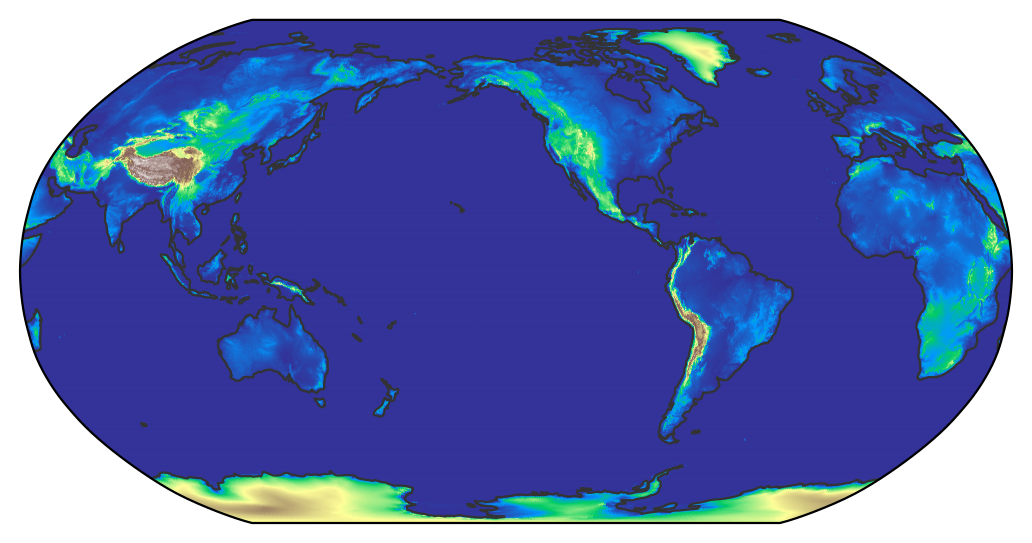

In [10]:
# egh.healpix_show(ds["orog"].sel(time = "2020-05-10T00:00:00"), cmap = "terrain", dpi=72);
egh.healpix_show(ds["orog"], cmap = "terrain", dpi=200);

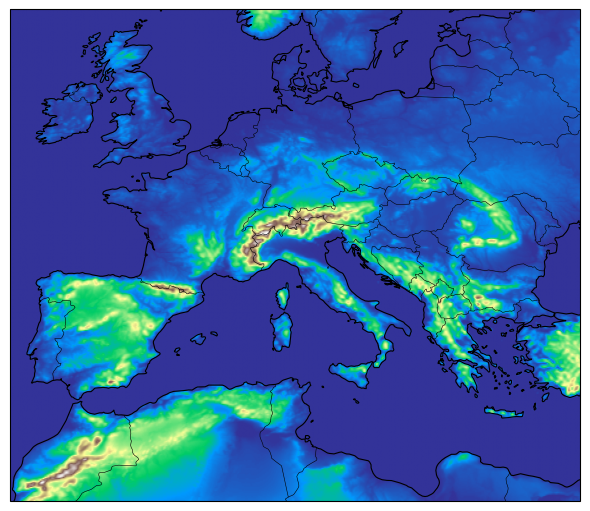

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import easygems.healpix as egh

# Optional: use cmocean or another color map
import cmocean

# Set up a regional plot for Europe
projection = ccrs.Robinson(central_longitude=10)
fig, ax = plt.subplots(
    figsize=(10, 5),
    subplot_kw={"projection": projection},
    constrained_layout=True
)

# Set the region of interest (e.g. Europe)
ax.set_extent([-10, 30, 30, 60], crs=ccrs.PlateCarree())

# Show the orography data, interpolated for smoothness
egh.healpix_show(ds["orog"], ax=ax, cmap="terrain", method="linear")

# Add geographic features
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)


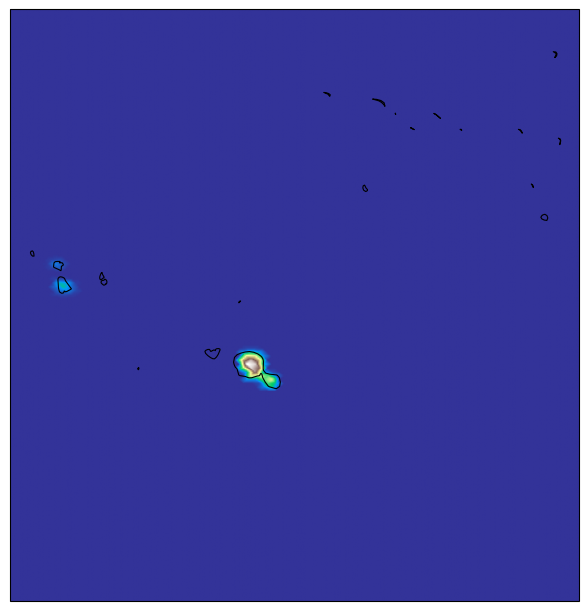

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import easygems.healpix as egh

# Define the Mercator projection
projection = ccrs.Mercator()

# Create the figure and axis
fig, ax = plt.subplots(
    figsize=(8, 6),
    subplot_kw={"projection": projection},
    constrained_layout=True
)

# Set the zoomed-in extent (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-152, -146, -20, -14], crs=ccrs.PlateCarree())

# Plot the data (adjust colormap and method as needed)
egh.healpix_show(ds["orog"], ax=ax, cmap="terrain", method="linear")

# Add features
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

plt.show()


In [1]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def make_custom_terrain_cmap(vmin=0, vmax=1200, vcut=5, base_cmap="terrain"):
    """
    Create a custom terrain colormap that emphasizes low elevations (e.g. oceans).

    Parameters:
        vmin (float): Minimum data value.
        vmax (float): Maximum data value.
        vcut (float): Transition value between ocean and land (e.g. 5 m).
        base_cmap (str): Name of the base colormap to use.

    Returns:
        cmap (Colormap): Custom terrain colormap.
        norm (Normalize): Custom normalization instance.
    """
    terrain_cmap = plt.get_cmap(base_cmap)

    # Fractions for each range
    low_fraction = (vcut - vmin) / (vmax - vmin)
    high_fraction = 1 - low_fraction

    # Create color arrays
    colors_undersea = terrain_cmap(np.linspace(0.16, 0.17, int(256 * low_fraction)))
    colors_land = terrain_cmap(np.linspace(0.25, 0.90, int(256 * high_fraction)))

    all_colors = np.vstack((colors_undersea, colors_land))
    terrain_map = mcolors.LinearSegmentedColormap.from_list("custom_terrain", all_colors)

    # Custom norm
    class LinearTwoRangeNorm(mcolors.Normalize):
        def __init__(self, vmin, vmax, vcut):
            self.vcut = vcut
            self.low_fraction = low_fraction
            super().__init__(vmin, vmax)

        def __call__(self, value, clip=None):
            return np.interp(value, [self.vmin, self.vcut, self.vmax], [0, self.low_fraction, 1])

        def inverse(self, value):
            return np.interp(value, [0, self.low_fraction, 1], [self.vmin, self.vcut, self.vmax])

    norm = LinearTwoRangeNorm(vmin, vmax, vcut)

    return terrain_map, norm


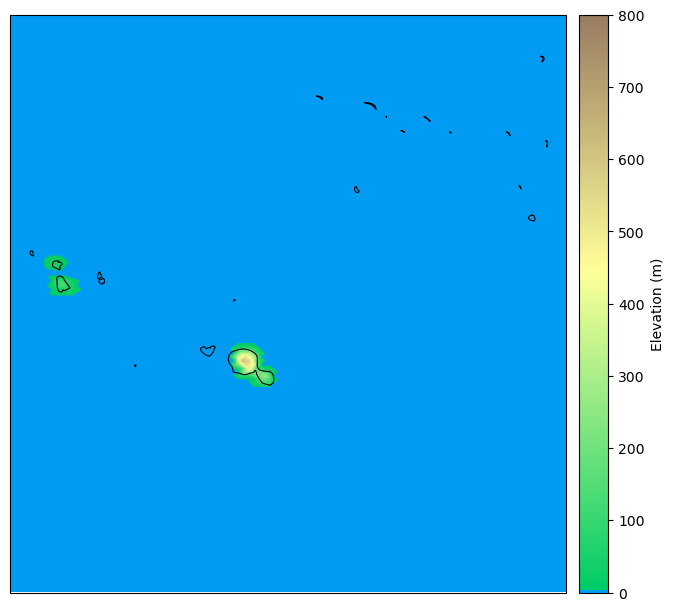

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import easygems.healpix as egh
from matplotlib.cm import ScalarMappable

# Get the custom colormap and norm
cmap, norm = make_custom_terrain_cmap(vmin=0, vmax=800, vcut=5)

# Define the Mercator projection
projection = ccrs.Mercator()

# Create the figure and axis
fig, ax = plt.subplots(
    figsize=(8, 6),
    subplot_kw={"projection": projection},
    constrained_layout=True
)

# Set the zoomed-in extent (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-152, -146, -20, -14], crs=ccrs.PlateCarree())

# Plot the data with custom colormap and normalization
egh.healpix_show(ds["orog"], ax=ax, cmap=cmap, norm=norm, method="linear")

# Add geographic features
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

# Add colorbar on the right
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Required for colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02, label="Elevation (m)")

plt.show()


In [7]:
for var in ds.data_vars:
    print(f"{var}: {ds[var].attrs.get('long_name', '')} ({ds[var].attrs.get('units', '')})")


clivi: atmosphere_mass_content_of_cloud_ice (kg m-2)
clt: cloud_area_fraction ()
clwvi: atmosphere_mass_content_of_cloud_condensed_water (kg m-2)
hflsd: surface_downward_latent_heat_flux (W m-2)
hfssd: surface_downward_sensible_heat_flux (W m-2)
huss: specific_humidity ()
pr: precipitation_flux (kg m-2 s-1)
prs: solid_precipitation_flux (kg m-2 s-1)
prw: atmosphere_mass_content_of_water_vapor ()
ps: surface_air_pressure (Pa)
psl: air_pressure_at_mean_sea_level (Pa)
rlds: surface_downwelling_longwave_flux_in_air (W m-2)
rldscs: surface_downwelling_longwave_flux_in_air_clear_sky (W m-2)
rlut: toa_outgoing_longwave_flux (W m-2)
rlutcs: toa_outgoing_longwave_flux_clear_sky (W m-2)
rsds: surface_downwelling_shortwave_flux_in_air (W m-2)
rsdscs: surface_downwelling_shortwave_flux_in_air_clear_sky (W m-2)
rsdt: toa_incoming_shortwave_flux (W m-2)
rsut: toa_outgoing_shortwave_flux (W m-2)
rsutcs: toa_outgoing_shortwave_flux_clear_sky (W m-2)
tas: air_temperature (K)
ts: surface_temperature (K)

In [39]:
import pandas as pd

# Set display options to left-align all columns
pd.set_option('display.colheader_justify', 'left')

# Create a list to store rows
data = []

# Loop through dataset variables
for var in ds.data_vars:
    name = var
    desc = ds[var].attrs.get('long_name', var).replace('_', ' ').title()
    unit = ds[var].attrs.get('units', '')
    data.append([name, desc, unit])

# Create and print the DataFrame
df = pd.DataFrame(data, columns=["Variable Name", "Description", "Unit"])

# Left-align both the headers and the content
display(df.style.set_properties(**{'text-align': 'left'}) \
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))


,Variable Name,Description,Unit
0,clivi,Atmosphere Mass Content Of Cloud Ice,kg m-2
1,clt,Cloud Area Fraction,
2,clwvi,Atmosphere Mass Content Of Cloud Condensed Water,kg m-2
3,hflsd,Surface Downward Latent Heat Flux,W m-2
4,hfssd,Surface Downward Sensible Heat Flux,W m-2
5,huss,Specific Humidity,
6,orog,Surface Altitude,m
7,pr,Precipitation Flux,kg m-2 s-1
8,prs,Solid Precipitation Flux,kg m-2 s-1
9,prw,Atmosphere Mass Content Of Water Vapor,
